In [42]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

Link to Post reads:

- TSNE original research paper: - 
- https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf



- Interactive Blog on how to effectively use TSNE: 
- https://distill.pub/2016/misread-tsne/

In [43]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
from matplotlib.pyplot import cm
import seaborn as sns

In [44]:
from sklearn.datasets import load_digits
digits = load_digits()

In [45]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [46]:
digits.data # flat output

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [47]:
digits.data.shape

(1797, 64)

In [48]:
pd.DataFrame(digits.data)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [49]:
X = digits.data
Y = digits.target  # we just use for visualisation not for algorithm

In [50]:
digits.images.shape

(1797, 8, 8)

In [51]:
digits.images[0]  # first image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

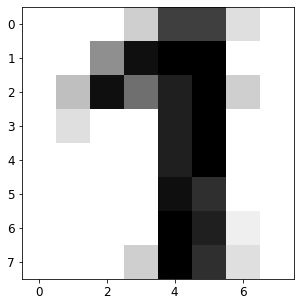

In [52]:
plt.gray()
plt.imshow(digits.images[1500], cmap=plt.cm.gray_r)

In [53]:
pd.Series(digits.target).value_counts()

<IPython.core.display.Javascript object>

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [54]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(len(np.unique(Y))))

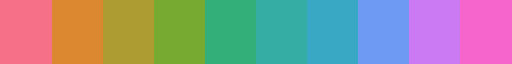

In [55]:
cmap

## PCA

In [56]:
# 64 dimesion ---> 2 dimension

In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
z1 = pca.transform(X)

In [58]:
z1.shape

(1797, 2)

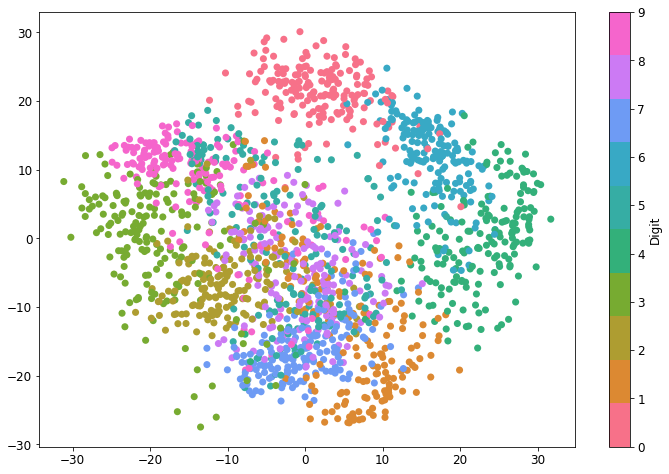

In [59]:
plt.rcParams["figure.figsize"] = (12,8)

fig, ax = plt.subplots()
im = ax.scatter(z1[:,0], z1[:,1], s=50, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

In [60]:
pca.explained_variance_            

array([179.0069301 , 163.71774688])

In [61]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [62]:
sum(pca.explained_variance_ratio_)

0.28509364823697564

## t-SNE

In [63]:
from sklearn.manifold import TSNE

z2 = TSNE(n_components=2, random_state=0, perplexity=30.2).fit_transform(X)

In [64]:
z2.shape

(1797, 2)

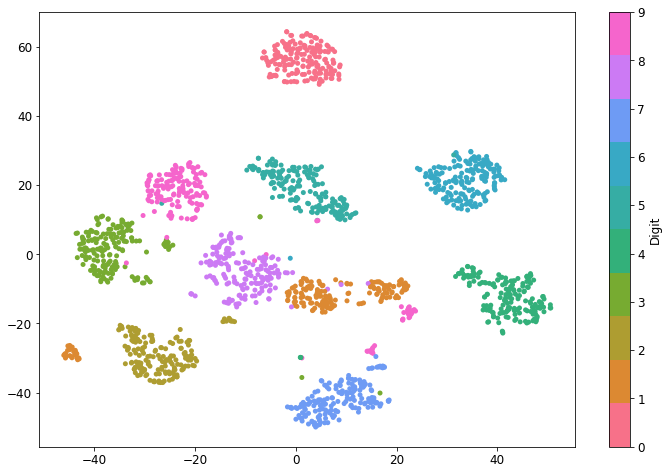

In [65]:
fig, ax = plt.subplots()
im = ax.scatter(z2[:,0], z2[:,1], s=25, c=Y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

- Visualisation of clusters

In [69]:
1- (2 / 64)

0.96875

In [68]:
# 97% compression 